In [24]:
import random
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import torch
from torch import nn # nn contains all of Pytorch building blocks for neural network
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms
from torchvision.utils import make_grid

## Introduction
`Deep learning` is a specialised form of deep learning that involves neural network with many deep layers. Neural networks are designed to mimic the human's brain ability to recognize patterns and intercept complex data such as iamge, sound, or text

### Difference b/w machine learning and deep learning

<ul>
    Machine learning is used for tabular or structured data
  <li>
    Machine learning requires feature engineering (select best relevant features)
  </li>
  <li>
    Simpler and easy to interpret
  </li>
  <li>
    Are computationally efficient and doesn't require high processing power
  </li>
</ul>

<ul>
    Deep learning works better for unstructured data like images, text, sound or video
  <li>
    Doesn't requires feature engineering
  </li>
  <li>
    Due to complexity and depth, they are difficult to understand and are referred as black box
  </li>
  <li>
    Works better with large amount of training data
  </li>
  <li>
    Requires substantional competitive power
  </li>
</ul>

### Neural Network
They are complex computational models that are inspired by human brain strucutre and function. It consist of following layers
<ul>
  <li>
    Artifical neurons or nodes
  </li>
  <li>
    Input layer
  </li>
  <li>
    One or more hidden layers
  </li>
  <li>
    Output layer
  </li>
</ul>

`Neurons` are fundamental units of neural network which
<ul>
  <li>
    Recieves an input
  </li>
  <li>
    Process the input
  </li>
  <li>
    Produces an output
  </li>
</ul>

Each neuron has its own linear regresion model that is used to predict output using weighted inputs

Each neuron has an activation function that introduces non-linear into the network, enabling it to learn and model complex problems. An `activation function` decides whether a neuron should be activated or not. This means that `it will decide whether the neuron's input to the network is important or not in the process of prediction using simpler mathematical operations.`
<ul>
  <li>
    Sigmoid (outputs between 0 and 1)
  </li>
  <li>
    Tanh (output between -1 and 1)
  </li>
  <li>
    ReLu (ouput input directly if posiive otherwise 0. Widely used in hidden layers)
  </li>
</ul>

Neurons are organized into layers. There are three main
<ul>
  <li>
    Input Layer
  </li>
  <li>
    Hidden layers
  </li>
  <li>
    Output layer
  </li>
</ul>

`Input layer` recieves an input in raw form. Each neuron in this layer represents a feature of input data
<br/>
`Hidden layer` are layers that transform the input into something the output layer can use
<br/>
`Output layer` is final layer that produces the output. The number of neurons in this layer depends on nature of task

#### How neural network works?
<ol>
  <li>
    Each node has its own linear regression model composed of
      <ul>
        <li>
          Input Layer
        </li>
        <li>
          Weight
        </li>
        <li>
          Bias (Each neuron has bias that allows the activation function to be shifted left or right, which helps the model fit the data better)
        </li>
      </ul>
  </li>
  <li>
    Once input layer is determined, weights are assigned. It helps deremine the importance of any given variable, with larger ones contributong more significantly to the output
  </li>
  <li>
    All input multiplied by their respective weights are then summed
  </li>
  <li>
    The sum output is passed through an activation function which determines the output
  </li>
  <li>
    Output of one node becomes input of next node. This process of passing data from one layer to next layer defines the neural network as feed forward neural network
  </li>
</ol>

## PyTorch


### Tensor
`Tensors` are fundamental concept in deep learning serving as a primary data structure for storing and manipulating data. It is a multi-dimensional array that generalizes scalars, vectors, and matrices to higher dimensions

It is a way to represenst complex data structures and are essential for performing mathematical operaiton in deep learning. In Pytorchm, almost everything is referred as tensor

In context of deep learning, tensors refers to the generalization of vectors and matrices to an arbitary number of dimensions. Another name for the same concept is *`multi-dimensional array`*

Types of tensors include


*   Scalar
*   Vector
*   Matrix
*   3D Tensor
*   ND Tensor



**`Scalar tensor`** are single numbers and also known as 0 dimensional tensor

In [ ]:
scalar = torch.tensor(7) #scalar tensor
print(f"Scalar: {scalar}")
print(f"Dimension of scalar: {scalar.ndim}")
print(f"Type: {type(scalar)}")

Scalar: 7
Dimension of scalar: 0
Type: <class 'torch.Tensor'>


We can retrieve the data inside a tensor as a python integer

In [ ]:
print(f"Item inside the scalar: {scalar.item()}") # Here we get the value stored as a python integer
print(f"Type of item stored in the scalar: {type(scalar.item())}")

Item inside the scalar: 7
Type of item stored in the scalar: <class 'int'>


**`Vector`** are one dimensional array of numbers

In [ ]:
vector = torch.tensor([7, 7]) #vector has magnitude and a direction
print(f"Vector: {vector}")  # you can calculate the number of dimension by counting the square
                            # brackets []
print(f"Dimension of vector: {vector.ndim}")
print(f"Shape of vector: {vector.shape}")

Vector: tensor([7, 7])
Dimension of vector: 1
Shape of vector: torch.Size([2])


**`Matrix`** are two-dimensional array of numbers

In [ ]:
MATRIX = torch.tensor([[7, 8],
                       [9, 10]]) #matrix is usally indicated with capital name

print(f"Matrix: {MATRIX}")
print(f"Dimension of matrix: {MATRIX.ndim}")
print(f"Shape of matrix: {MATRIX.shape}")
print(f"Type of matrix: {type(MATRIX)}")
print(f"First item in the matrix: {MATRIX[0]}")

Matrix: tensor([[ 7,  8],
        [ 9, 10]])
Dimension of matrix: 2
Shape of matrix: torch.Size([2, 2])
Type of matrix: <class 'torch.Tensor'>
First item in the matrix: tensor([7, 8])


**3D Tensor** is a three-dimensional array of numbers, often used to
represent a sequence of matrices

In [ ]:
 TENSOR = torch.tensor([[[1, 2],
                         [3, 4],
                         [4, 5]]]) # tensor are also named capital
print(f"Tensor: {TENSOR}")
print(f"Shape of tensor: {TENSOR.shape}")
print(f"Dimension of tensor: {TENSOR.ndim}")
print(f"Type of tensor: {type(TENSOR)}")
print(f"Second item in the tensor: {TENSOR[0]}")

Tensor: tensor([[[1, 2],
         [3, 4],
         [4, 5]]])
Shape of tensor: torch.Size([1, 3, 2])
Dimension of tensor: 3
Type of tensor: <class 'torch.Tensor'>
Second item in the tensor: tensor([[1, 2],
        [3, 4],
        [4, 5]])


**Random tensors** are tensors filled with random values. Random numbers are crucial in deep learning for various reasons

*   Weights in neural network are typically initialized with random values
*   Random tensors can be used to introduce randomness and variability in the input data during training
*   The way neural network learn is they start with tensors full of random numbers and then adjust those random number to better represent the data



***`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers`***

In [ ]:
# create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
print(f"Tensor with random values and of shape (3, 4): \n\n{random_tensor}")

Tensor with random values and of shape (3, 4): 

tensor([[0.6672, 0.1332, 0.8477, 0.5400],
        [0.7751, 0.2600, 0.5883, 0.7640],
        [0.3466, 0.2019, 0.6494, 0.5128]])


In [ ]:
# create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224, 224, 3)) #height, width, of color
                                                          # channels (R, G, B)
random_image_size_tensor

tensor([[[0.7789, 0.9671, 0.9627],
         [0.9973, 0.0995, 0.5866],
         [0.9299, 0.4142, 0.7746],
         ...,
         [0.7212, 0.3567, 0.0506],
         [0.4683, 0.7544, 0.8661],
         [0.9962, 0.1573, 0.9356]],

        [[0.1309, 0.3091, 0.3121],
         [0.1000, 0.6089, 0.5859],
         [0.3567, 0.7816, 0.6649],
         ...,
         [0.1116, 0.6984, 0.6725],
         [0.1077, 0.0357, 0.9666],
         [0.9041, 0.2112, 0.4902]],

        [[0.7164, 0.5593, 0.4399],
         [0.1770, 0.1366, 0.8591],
         [0.4599, 0.4374, 0.6637],
         ...,
         [0.3293, 0.8928, 0.1439],
         [0.6255, 0.5210, 0.1135],
         [0.3691, 0.4658, 0.5474]],

        ...,

        [[0.8911, 0.5221, 0.6324],
         [0.1247, 0.4185, 0.0520],
         [0.5082, 0.2870, 0.4402],
         ...,
         [0.6544, 0.6166, 0.6535],
         [0.6125, 0.9050, 0.7228],
         [0.4790, 0.4963, 0.1604]],

        [[0.0831, 0.0322, 0.0552],
         [0.1448, 0.1376, 0.6349],
         [0.

In [ ]:
# we can create a tensor of zeros values
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# We can also create a tensor os specified shape containing only one
ones = torch.ones(size=(4, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
torch.arange(0 ,10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
even_numbers = torch.arange(0, 10, 2)
even_numbers

tensor([0, 2, 4, 6, 8])

In pytorch we use **tensor_like** function

*   When you need to create new tensors that match the shape and data type of existing tensors, thus ensuring consistency
*   Make the code more readable and concise
*   Simplifies the process of creating tensors that share properties with an existing tensor



In [ ]:
# creating tensors like
ten_zeros = torch.zeros_like(input=even_numbers)
ten_zeros

tensor([0, 0, 0, 0, 0])

### Indexing tensors

We can index tensors with the same notation just as in NumPy and other python scientific libraries

**Vector Tensors**

In [ ]:
tensor = torch.arange(0, 10)

print(f"Tensor: {tensor}")
print(f"\nFirst Element: {tensor[0]}")
print(f"\nLast Element: {tensor[-1]}")
print(f"\nFirst Two elements: {tensor[:2]}")

Tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

First Element: 0

Last Element: 9

First Two elements at 1 index: tensor([0, 1])


**Matrix Tensors**

In [ ]:
print(f"Tensor: {random_tensor}")
print(f"\nElement on 0 index: {random_tensor[0]}")
print(f"\nFirst Element: {random_tensor[0][0]}")
print(f"\nLast Element: {random_tensor[-1][-1]}")
print(f"\nFirst Two elements at 1 index: {random_tensor[1][:2]}")

Tensor: tensor([[0.6672, 0.1332, 0.8477, 0.5400],
        [0.7751, 0.2600, 0.5883, 0.7640],
        [0.3466, 0.2019, 0.6494, 0.5128]])

Element on 0 index: tensor([0.6672, 0.1332, 0.8477, 0.5400])

First Element: 0.6672316193580627

Last Element: 0.5127742886543274

First Two elements at 1 index: tensor([0.7751, 0.2600])


### Named tensors
***Named tensors*** are feature in PyToch that allows you to associate names with the dimensions of a tenor, making tensor opeartion more readable and less error prone. It also improves readability and makes debugging easy

In [ ]:
tensor = torch.rand(2, 3, 3, names=('Red', 'Green', 'Blue'))
print(f"Tensor: {tensor}")
print(f"\nTensor name: {tensor.names}")

Tensor: tensor([[[0.0272, 0.3874, 0.4744],
         [0.2397, 0.3241, 0.3169],
         [0.1423, 0.6742, 0.4621]],

        [[0.5829, 0.1077, 0.1516],
         [0.8369, 0.1507, 0.9246],
         [0.4054, 0.4225, 0.5438]]], names=('Red', 'Green', 'Blue'))

Tensor name: ('Red', 'Green', 'Blue')


<ipython-input-14-055b0cc3d740>:1: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at ../c10/core/TensorImpl.h:1921.)
  tensor = torch.rand(2, 3, 3, names=('Red', 'Green', 'Blue'))


We can select a specific dimension using its name

In [ ]:
red_color = tensor.select(dim='Red', index=0)
print(f"Red color data: \n{red_color}")

Red color data: 
tensor([[0.0272, 0.3874, 0.4744],
        [0.2397, 0.3241, 0.3169],
        [0.1423, 0.6742, 0.4621]], names=('Green', 'Blue'))


In [ ]:
green_color = tensor.select(dim='Green', index=0)
print(f"Green color data: \n{green_color}")

Green color data: 
tensor([[0.0272, 0.3874, 0.4744],
        [0.5829, 0.1077, 0.1516]], names=('Red', 'Blue'))


In [ ]:
blue_color = tensor.select(dim='Blue', index=0)
print(f"Blue color data: \n{blue_color}")

Blue color data: 
tensor([[0.0272, 0.2397, 0.1423],
        [0.5829, 0.8369, 0.4054]], names=('Red', 'Green'))


We can rename existing tensors

In [ ]:
new_tensor = tensor.rename(Red='red_color', Green='green_color')
print(f"New Tensor: {new_tensor}")
print(f"\nNew names: {new_tensor.names}")

New Tensor: tensor([[[0.2436, 0.0957, 0.1743],
         [0.2378, 0.0855, 0.5250],
         [0.0725, 0.0408, 0.1775]],

        [[0.6060, 0.9309, 0.7031],
         [0.0628, 0.6746, 0.0414],
         [0.2047, 0.2586, 0.1226]]],
       names=('red_color', 'green_color', 'Blue'))

New names: ('red_color', 'green_color', 'Blue')


Performing some examples

In [ ]:
red, green, blue =  3, 64, 64
images = torch.rand(red, green, blue, names=('red', 'green', 'blue'))

print(f"Images {images}")

red_mean = images.mean(dim='red', keepdim=True)
green_std = images.std(dim='green', keepdim=False)

print(f"\nRed color mean: {red_mean}")
print(f"\nGreen color mean: {green_std}")

Images tensor([[[0.0622, 0.1264, 0.7123,  ..., 0.7022, 0.5376, 0.0841],
         [0.6538, 0.0045, 0.6487,  ..., 0.4707, 0.3573, 0.8898],
         [0.6224, 0.1207, 0.6166,  ..., 0.2881, 0.8859, 0.8363],
         ...,
         [0.3276, 0.4432, 0.6523,  ..., 0.9133, 0.2721, 0.2487],
         [0.6604, 0.4026, 0.8583,  ..., 0.3986, 0.3913, 0.7750],
         [0.6729, 0.9702, 0.8605,  ..., 0.7345, 0.8964, 0.1710]],

        [[0.6086, 0.8549, 0.0965,  ..., 0.2895, 0.8981, 0.5714],
         [0.5560, 0.1346, 0.1417,  ..., 0.2531, 0.9660, 0.1326],
         [0.4762, 0.3648, 0.7717,  ..., 0.3214, 0.6674, 0.1684],
         ...,
         [0.7767, 0.2220, 0.1748,  ..., 0.5914, 0.1453, 0.6945],
         [0.7204, 0.9521, 0.3169,  ..., 0.1089, 0.5585, 0.0336],
         [0.7296, 0.8808, 0.2808,  ..., 0.1825, 0.5623, 0.1948]],

        [[0.9736, 0.8402, 0.8647,  ..., 0.5777, 0.4864, 0.8276],
         [0.6686, 0.5525, 0.2231,  ..., 0.4558, 0.5644, 0.8896],
         [0.7455, 0.5204, 0.2836,  ..., 0.6366, 0.8

### Tensor element attributes

Tensors have some important attributes like

*   **tensor.dtype** (returns the data type of the tensor's elements)
*   **tensor.device** (indicates the device on which the tensor is stored like CPU, GPU)
*   **tensor.numel()** (returns the total number of elements in the tensor)
*   **tensor.layout** (returns the layout of tensor)
*   **tensor.requires_grad** (indicates whehter gradient computation is required for the tensor?)





The **dtype** argument specifies the numerical data type that will be contained in the tensor. It specifies the possible value the tensor can hold and the number of bytes per value.
<br/>
Computation in neural network are typically executed with 32-bit floating-point precision. 64-bit does not improve accuracy in the model and will require more memory and computing time

In [ ]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float32, # data type of the tensor
                               device="cpu", # what devices is your tensor on
                               requires_grad=False) # want pytorch to track gradients
float_32_tensor

tensor([3., 6., 9.])

In [ ]:
#always creates a copy
float_64_tensor = float_32_tensor.type(torch.float64) #float_32_tensor is not changed
float_64_tensor

tensor([3., 6., 9.], dtype=torch.float64)

In [ ]:
float_32_tensor.dtype

torch.float32

### Tensor Arithmetics

**We can perform arthematic operations on the tensors**

In [ ]:
# manipulating tensors
# additions, subtraction, multiplication (element-wise), division, matrix multiplication

In [ ]:
ten = torch.tensor([1, 2, 3])
print(f"Tensor: {ten}")
print(f"Adding 10 to the tensor: {ten + 10}")
print(f"Multiplying 25 with the tensor: {ten * 25}")
print(f"Multiplying 10 with the tensor: {torch.mul(ten, 10)}")
print(f"Dividing the tensor by 2: {ten/ 2}")

Tensor: tensor([1, 2, 3])
Adding 10 to the tensor: tensor([11, 12, 13])
Multiplying 25 with the tensor: tensor([25, 50, 75])
Multiplying 10 with the tensor: tensor([10, 20, 30])
Dividing the tensor by 2: tensor([0.5000, 1.0000, 1.5000])


There are two main types of multiplication in deep learning

1.   Element wise multiplication
2.   Matrix multiplication (dot product) (most common operation in deep learning)



In [ ]:
tensor = torch.tensor([1, 2, 3])
tensor

tensor([1, 2, 3])

In [ ]:
# element wise multiplication
print(f"Element wise multiplication: {tensor * tensor }")
print(f"Dot multiplication: {torch.dot(tensor, tensor)}")

Element wise multiplication: tensor([1, 4, 9])
Dot multiplication: 14


`tensor @ tensor` **@** is other way for matrix multiplication (not a recommended approach)

In [ ]:
# calculate time taken my manually calculating dot product
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] + tensor[i]

print(value)

tensor(12)
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 20.7 ms


In [ ]:
# calculate time taken by using built-in dot method
%%time
torch.dot(tensor, tensor)

CPU times: user 441 µs, sys: 51 µs, total: 492 µs
Wall time: 513 µs


tensor(14)

In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 774 µs, sys: 875 µs, total: 1.65 ms
Wall time: 1.89 ms


tensor(14)

There are two main rules that performing matrix multiplication needs to satisfy

1.   The inner dimension must match
*   (3, 2) @ (3, 2) will not work
*   (2, 3) @ (3, 2) will work
*   (3, 2) @ (2, 3) will work

2.   The resulting matrix has the shape of the outer dimension
*   (2, 3) @ (3, 2) will have shape (2, 2)
*   (3, 2) @ (2, 3) will have shape (3, 3)





In [ ]:
# torch.matmul(torch.rand(3, 2), torch.rand(3, 2)) # error because inner dimension
                                # do not match

In [ ]:
torch.matmul(torch.rand(2, 3), torch.rand(3, 2)) # no error

tensor([[0.2433, 1.2289],
        [0.0890, 0.5614]])

In [ ]:
torch.matmul(torch.rand(2, 3), torch.rand(3, 2)).shape

torch.Size([2, 2])

One of the most common errors in deep learning is shape error. To fix our tensor shape issues, we can manipulate the shape of one of our
tensors using a transpose

In [ ]:
torch.matmul(torch.rand(3, 2), torch.rand(3, 2).T) # no error

tensor([[0.0636, 0.6495, 0.4846],
        [0.0420, 0.3916, 0.3926],
        [0.0702, 0.6126, 0.7372]])

### Tensor Aggregation

**finding min, max, mean, sum, etc**

In [ ]:
tensor = torch.arange(0, 100)

In [ ]:
print(f"\nTensor: {tensor}")
print(f"Minimum value: {tensor.min}")
print(f"Maximum value: {tensor.max}")


Tensor: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
Minimum value: <built-in method min of Tensor object at 0x7a41fb2f6a20>
Maximum value: <built-in method max of Tensor object at 0x7a41fb2f6a20>


**mean doesn't work with int64 or long**

In [ ]:
print(f"Mean: {torch.mean(tensor.type(torch.float32))}")
# converting to float32
print(f"Median: {tensor.median()}")
print(f"Sum: {torch.sum(tensor)}")

Mean: 49.5
Median: 49
Sum: 4950


#### Positional min max of tensors
In the context of tensors, finding positional min and max involves not only determining the minimum and maximum values but also identifying the position (*indices*) where these value occur.

In [ ]:

print(f"Position of minimum value: {tensor.argmin()}")
# returns the index position where the minimum value occurs

print(f"Position of maximum value: {tensor.argmax()}")
# returns the index position where the minimum value occurs

Position of minimum value: 53
Position of maximum value: 7


In [ ]:
tensor = torch.rand(8, 8)

In [ ]:
print(f"Tensor: {tensor}")
print(f"Position of minimum value: {tensor.argmin()}")
print(f"Position of maximum value: {tensor.argmax()}")

Tensor: tensor([[9.1966e-01, 2.7856e-02, 8.5210e-01, 8.5290e-01, 2.8515e-01, 4.7567e-01,
         7.3274e-01, 9.8351e-01],
        [1.4489e-01, 3.4806e-01, 5.9828e-02, 2.3390e-01, 5.1137e-01, 9.0029e-01,
         4.7636e-01, 6.9137e-01],
        [8.3104e-02, 8.3162e-01, 5.2739e-01, 3.1169e-01, 4.1097e-01, 2.3216e-02,
         6.4255e-01, 4.5943e-01],
        [7.4951e-02, 5.2587e-01, 2.4780e-02, 4.1653e-01, 9.3602e-01, 9.1294e-01,
         4.1436e-02, 7.7510e-01],
        [8.0107e-01, 7.5273e-01, 8.5156e-01, 5.7133e-01, 5.0669e-01, 6.3028e-01,
         1.6166e-01, 5.3324e-03],
        [7.0224e-01, 4.9582e-01, 5.5058e-01, 4.7480e-01, 5.7500e-01, 3.1480e-01,
         9.0592e-01, 7.0695e-01],
        [6.0275e-03, 1.5420e-01, 5.2672e-01, 4.6139e-01, 7.6842e-01, 6.2776e-04,
         9.2860e-01, 9.4003e-01],
        [9.0865e-01, 1.2922e-01, 4.7545e-01, 3.4608e-01, 6.1136e-01, 9.1591e-01,
         5.7778e-01, 8.0731e-01]])
Position of minimum value: 53
Position of maximum value: 7


### Reshaping, Stacking, Qqueezing and Unsqueezing Tensors



*   **Reshaping** - reshapes an input tensor to a defined shape
*   **View** -  return a view of an input tensor of certain but keep the same memory as the originial tensor
*   **Stacking** - combine multiple tensors on top of each other
*   **Squeeze** -  remove all `1` dimensions from a tensor
*   **Unsqueeze** - add a `1` dimension to a target tensor
*   **Permute** - return a view of the input with dimensions permuted (swapped) in a certain way

In [ ]:
tensor = torch.rand(3, 5)
tensor, tensor.shape

(tensor([[0.3823, 0.7687, 0.2623, 0.4473, 0.1350],
         [0.0723, 0.2757, 0.5578, 0.1750, 0.6667],
         [0.7786, 0.0263, 0.6258, 0.8889, 0.8857]]),
 torch.Size([3, 5]))

In [ ]:
tensor_reshaped = tensor.reshape(1, 15)
tensor_reshaped, tensor_reshaped.shape

(tensor([[0.3823, 0.7687, 0.2623, 0.4473, 0.1350, 0.0723, 0.2757, 0.5578, 0.1750,
          0.6667, 0.7786, 0.0263, 0.6258, 0.8889, 0.8857]]),
 torch.Size([1, 15]))

In [ ]:
z = tensor.view(3, 5) #changing z changes tensor (because a view of tensor shares
                    # the same memory as original)
z, z.shape

(tensor([[0.1364, 0.2351, 0.1271, 0.8342, 0.5425],
         [0.7679, 0.2764, 0.1265, 0.2041, 0.3384],
         [0.8958, 0.1590, 0.2624, 0.5675, 0.2305]]),
 torch.Size([3, 5]))

In [ ]:
z[:, 0] = 5

In [ ]:
tensor

tensor([[5.0000, 0.2351, 0.1271, 0.8342, 0.5425],
        [5.0000, 0.2764, 0.1265, 0.2041, 0.3384],
        [5.0000, 0.1590, 0.2624, 0.5675, 0.2305]])

**Stacking** combines multiple tensors along a new dimension. This is useful for creating batches of data or combining ouputs from different models


In [ ]:
# stacks tensors on top of each other
x_stacked = torch.stack([tensor, tensor], dim=2)
x_stacked

tensor([[[5.0000, 5.0000],
         [0.2351, 0.2351],
         [0.1271, 0.1271],
         [0.8342, 0.8342],
         [0.5425, 0.5425]],

        [[5.0000, 5.0000],
         [0.2764, 0.2764],
         [0.1265, 0.1265],
         [0.2041, 0.2041],
         [0.3384, 0.3384]],

        [[5.0000, 5.0000],
         [0.1590, 0.1590],
         [0.2624, 0.2624],
         [0.5675, 0.5675],
         [0.2305, 0.2305]]])

**Squeezing** removes dimensions of size 1 from a tensor. This is useful for removing unnecessary dimensions, especially after operations like aggregations that can add extra dimensions.

In [ ]:
tensor = torch.tensor([[[1, 2, 3], [4, 5, 6]]])
print("Original Tensor with extra dimension:\n", tensor)
print("Original Tensor dimension:", tensor.ndim)

# Squeeze the tensor to remove dimensions of size 1
squeezed_tensor = tensor.squeeze()
print("\nSqueezed Tensor:\n", squeezed_tensor)
print("Squeezed Tensor dimension:", squeezed_tensor.ndim)


Original Tensor with extra dimension:
 tensor([[[1, 2, 3],
         [4, 5, 6]]])
Original Tensor dimension: 3

Squeezed Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Squeezed Tensor dimension: 2


**Unsqueezing** adds a dimension of size 1 to a tensor. This is useful when you need to add a batch dimension or channel dimension for specific operations or model requirements.

In [ ]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("Original Tensor:\n", tensor)
print("Original Tensor dimension:", tensor.ndim)

# Unsqueeze the tensor to add a new dimension at dim=0
unsqueezed_tensor = tensor.unsqueeze(dim=0)
print("Unsqueezed Tensor along dim=0:\n", unsqueezed_tensor)
print("Unsqueezed Tensor dimension:", unsqueezed_tensor.ndim)


Original Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Original Tensor dimension: 2
Unsqueezed Tensor along dim=0:
 tensor([[[1, 2, 3],
         [4, 5, 6]]])
Unsqueezed Tensor dimension: 3


In [ ]:
# torch.permute - rearranges the dimensions of a target tensor in a specified order
# commonly used for images
x_original = torch.rand(size=(224, 224, 3))
x_permuted = x_original.permute(2, 0, 1) # the 2nd index (3) is re-ordered to start

# re-orders the shape indexes

print(f"Original shape: {x_original.shape}")
print(f"Permuted shape: {x_permuted.shape}")

Original shape: torch.Size([224, 224, 3])
Permuted shape: torch.Size([3, 224, 224])


In [ ]:
# numpy and pytorch
# numpy to pytorch (torch.from_numpy(ndarray))
# pytorch to numpy (torch.Tensor.numpy())

In [ ]:
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) #numpy default datatype is float64
tensor

tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64)

In [ ]:
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
numpy_tensor, numpy_tensor.dtype

(array([1., 1., 1., 1., 1., 1., 1.], dtype=float32), dtype('float32'))

### Python Reproduceability

**Reproduceability in PyTorch** (or any other machine learning framework) refers to the ability to consistently reproduce the same results given the same input and condition. This is cruical for debugging, verifying experiments, and comparing models

Achieving reproduceability ensures that the results are reliable and can be independently verified by others or by yourself at a later time

In [ ]:
random_A = torch.rand(3, 4)
random_B = torch.rand(3, 4)

print(f"Random tensor A: {random_A}")
print(f"Random tensor B: {random_B}")
print(random_A == random_B)

Random tensor A: tensor([[0.0482, 0.7124, 0.8801, 0.6303],
        [0.4352, 0.1096, 0.8976, 0.8997],
        [0.2484, 0.4821, 0.9280, 0.9965]])
Random tensor B: tensor([[0.5120, 0.8107, 0.0403, 0.4691],
        [0.2694, 0.5730, 0.2722, 0.0104],
        [0.5658, 0.4776, 0.8009, 0.8854]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


Setting seeds for random number generators ensures that the pseudo-random numbers generated are the same each time.
<br/>
`Random number generators` in computers are not truly random but pseudo-random. The use deterministic algorithms to produces sequences of numbers that only appear to be random

In [ ]:
# lets make some random but reproduceable tensors

RANDOM_SEED = 2 # const that's why capitalized

torch.manual_seed(RANDOM_SEED) #set seed for PyTorch
random_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_D = torch.rand(3, 4)

print(f"Random tensor C: {random_C}")
print(f"Random tensor D: {random_D}")
print(random_C == random_D)


Random tensor C: tensor([[0.6147, 0.3810, 0.6371, 0.4745],
        [0.7136, 0.6190, 0.4425, 0.0958],
        [0.6142, 0.0573, 0.5657, 0.5332]])
Random tensor D: tensor([[0.6147, 0.3810, 0.6371, 0.4745],
        [0.7136, 0.6190, 0.4425, 0.0958],
        [0.6142, 0.0573, 0.5657, 0.5332]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


**Read**
<br/>
https://pytorch.org/docs/stable/notes/randomness.html
<br/>
https://en.wikipedia.org/wiki/Random_seed

### Putting tensors and models on GPU

The reason we want our tensors/models on the GPU is because using a GPU results in faster calculation

In [ ]:
# create a tensor (on CPU)
tensor = torch.tensor([1, 2, 3], device= 'cpu')
tensor

tensor([1, 2, 3])

In [ ]:
tensor = torch.tensor([1, 2, 3], device='cuda')
tensor

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

# PyTorch Workflow

Typically pytorch workflow includes

1.   Get data ready
2.   Build or pock a pre-trained model
      *   Build a trainig loop
      *   Pick a loss funciton optimizer
      *   Repeat the step 2

3.   Fit the model to data to make prediction
4.   Evaluate the model
5.   Improve through experimentation
6.   Save and reload your trained model



In [ ]:
weight = 0.7
bias = 0.3

In [ ]:
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)  # capital because mostly it is matrix or tensor
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Training data

Splitting data into training and test set is the most important concept in machine learning.
<br/>
In general
*   Training data (60-80)%
*   Validation data (10-20 of)% (not always used)
*   Test data (10-20)%

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing Data
After splitting the training and testing data, it is a good practice to visualize data to see any visible patterns or outliers

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plot training data, test data and compares predictions
  """

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
            # color blue and size is 4

  plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')
  if predictions is not None:
    # plot predictions if they exists
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={"size": 14})


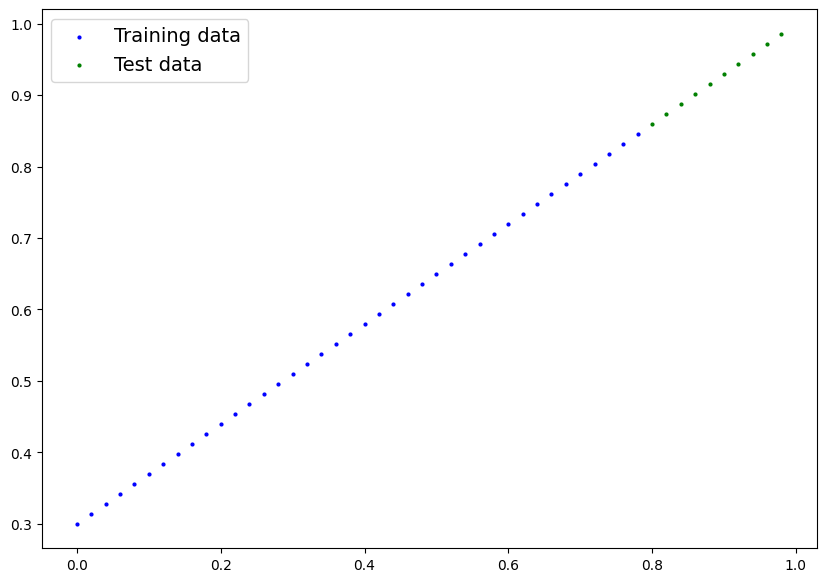

In [ ]:
plot_predictions()

### Selecting Model

Initially, lets consider using the simplest model out there, `Linear Regression Model`
<br/>
**y = x * weight + bias**

We need to estimate the value of *weight* abd *bias*, which are parameters in our model, based on the data we have, such that the values of **y** through the model actually measure the data we have in **x**

In [ ]:
# Module is the base class for all neural network modules in PyTorch. Your
# models should subclass this

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # nn.Parameter tells PyTorch that a tensor should be considered a parameter
    # of a module and will be automatically added to list of its parameters
    # Parameter is typically used to define learnablke parameters in custom
    # layers
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method defines the computation performed at every call of the module
  # It is where you specify the operations that happen during the forward pass of
  # your network. It is required
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias

We start with random values of weight and bias, look at training data, and adjust the random values to better represent (or get
closer to) the ideal values that better fit the actual data

This is done by

1.   Gradient Descent
2.   Backpropagation



### Model Learning and Loss Functions

A loss function (or cost function) is a function that computes a single numerical value
that the learning process will attempt to minimize.

Conceptually, a loss function is a way of prioritizing which errors to fix from our
training samples, so that our parameter updates result in adjustments to the outputs for
the highly weighted samples instead of changes to some other samples’ output that had
a smaller loss.

#### Backpropagation
**Backpropagation**, short for `backward propagation of errors` is a fundamental algorithm for training neural networks. It computes the gradient of loss function function with respect to each weight by using chain rule

Steps of backpropagation involves

1.   Forward Pass
    *   The input data is passed through the network layer by layer, to compute the output (predictions)

2.   Loss Calculation
    *   Calculate the loss using the predicted output and actual target
    *   The loss function compares the network's predictions with the actual target values to measure the prediction error
    *   Minimizing the loss error improves the model prediction

3.   Backward propagation
    *  Compute the gradient of the loss with respect to the output layers parameters
    *  Propagate the error backward through each layer

4.   Update parameters
    *  Update the weights and biases using gradient descent



#### Gradient Descent
**Gradient descent** is an optimization algorithm used to minimize the loss function in the machine and deep learning algorithms. Minimizing the cost funciton improves model accuracy

Neural network uses gradient descent to learn by following the steps

1.   Randomly initializes the network weight weights and biases
2.   Pass the input data through network to obtain output predictions
    *  This involves calculating weighted sums and applying activation function

3. We compute the loss using predicted output and the actual target values
4. We calcualte the gradient of loss function
    *  Gradient points in the direction of steepest decrease in loss function

5. We update the network parameter using gradients calculated during backpropagation

6. Repeat the steps unitl the loss converges to minimum value



**The difference b/w gradient and backpropagation is**
*   *Backpropagation* is used to calculate the error and figure out how each part of the neural network contributed to error
  * Happens after the network has made a prediction and we know how wrong it was

*   *Gradient descent* is an optimization technique/algorithm that updates the neural network weight to minimize the error
  * It happens after backpropagation

In [ ]:
torch.manual_seed(42)

# create an instance of the mode

model_0 = LinearRegressionModel()

# Checkout the parameters
print(f"Parameters of the model: \n {list(model_0.parameters())}")

Parameters of the model: 
 [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
print(f"Parameters of the model: {model_0.state_dict()}")

Parameters of the model: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


**torch.inference_mode** is a context manager in PyTorch used to improve the performance of inference (making predictions) by disabling gradienta computation. It is especially designed for interfernce where you do not need to update the model weights

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

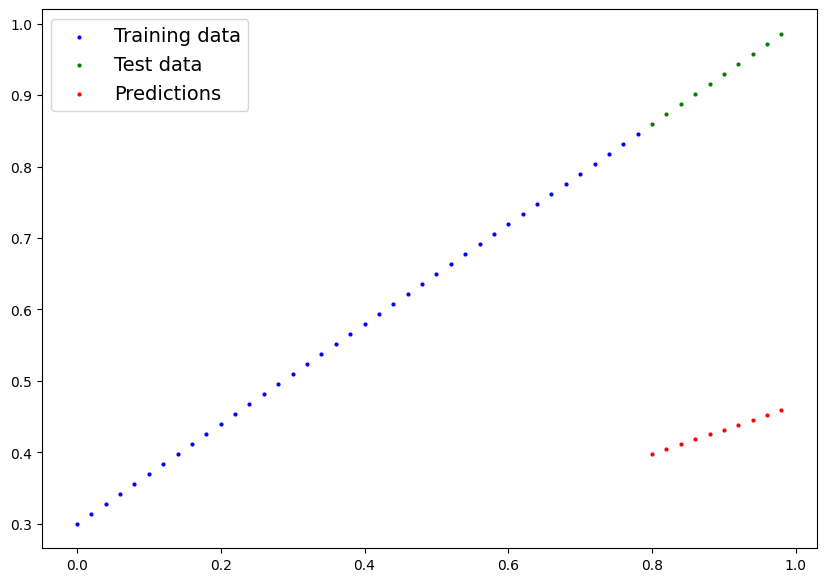

In [ ]:
plot_predictions(predictions=y_preds)

**nn.L1Loss** is a loss function in PyTorch that calculates the mean absolute error (MAE) between the predicted values and the actual target values

In [ ]:
loss_fn = nn.L1Loss()
loss = loss_fn(y_preds, X_test)
print(f"Loss: {loss}")

Loss: 0.46153610944747925


In [ ]:
# classification with pytorch

In [ ]:
# classification is a problem of predicting whether something is one thing or
# another (there can be multiple things as the options)

In [ ]:
n_samples = 1000

# Create circles
X, y  = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
print(f"First five samples of X:\n {X[:5]}")
print(f"First five samples of y:\n {y[:5]}")

First five samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y:
 [1 1 1 1 0]


In [ ]:
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

circles.head(5)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


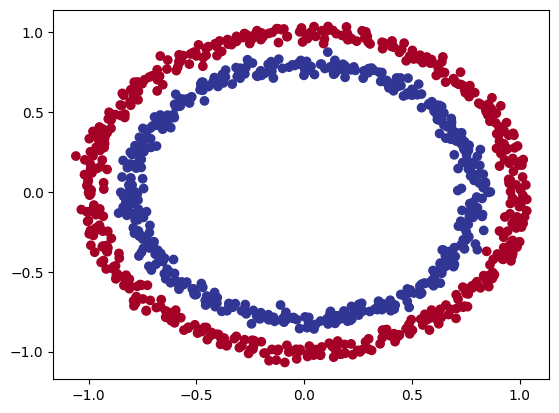

In [ ]:
plt.scatter(x=X[:, 0],
                y=X[:, 1],
                c=y,
                cmap = plt.cm.RdYlBu)

In [ ]:
 X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# turning data into tensors

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# building a model

# to do so we want to
# 1. Setup device agonistic code so our model will run on accelerator (GPU) if
# there is one

# 2. Construct a model
# 3. Defube a loss function and optimizer
# 4. Create a training and test loop

In [ ]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# create a model

# 1. Subclasses (almost all models in PyTorch is subclass in nn.Module)
# 2. Create 2 layers (nn.Linear) that are capable of handling the shapes of
# our data

# 3. Define a forward() method that outlines the forward pass of the model
# 4. Instatiate an isntance of our model class and send it to the target device

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super(). __init__()
    # 2. Create 2 layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # 3. Define forward() method
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) #x -> layer_1 -> layer_2 -> output

# 4. Instance of model
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# replicate model using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0768,  0.2135],
                      [ 0.4515, -0.4757],
                      [ 0.1825, -0.5347],
                      [ 0.5259, -0.4771],
                      [ 0.4495,  0.4100]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.2971, -0.3556,  0.4432,  0.3369,  0.1073], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3397, -0.0172,  0.0162,  0.2890,  0.3555]], device='cuda:0')),
             ('1.bias', tensor([0.2026], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"First 10 predictions: {untrained_preds[:10]}")
print(f"\nFirst 10 labels: {y_test[:10]}")

First 10 predictions: tensor([[0.1006],
        [0.1922],
        [0.0736],
        [0.1073],
        [0.4119],
        [0.4652],
        [0.4550],
        [0.5198],
        [0.0593],
        [0.2021]], device='cuda:0')

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Fully Connected Neural Network

A **fully connected neural network** (also known as dense neural network) is one of the simplest types of artifical neural networks where each neuron in one layer is connected to every neuron in subsequent layer

It typically consists of an input layer, one or more hidden layers, and an output layer.

Every neuron in a layer recieves input from all the neurons in the previous layer and passes its output to all neuron of next layer

Each neuron has a weight and bias term which are learnable parameters that the model adjust to minimize error

**nn.Linear** is a module in PyTorch that implements a fully connected layer, also known as linear layer
<br/>
Key parameter includes

*   **in_features** The number of input features (size of each input samples)
*   **out_features** The number of output features (size of each output samples)
* **bias** (a flag to indicate if a bias term should be included)



In [ ]:
# Create a model class that inherts nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower)
  # Input layer data passed to the hidden layer H1
  # Data is passed from H1 to hidden layer H2
  # After that it is passed to output layer

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,  h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  # we need a function that moves everything forward
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

**torch.nn.functional** is a module in PyTorch that provides functions for various operations including applying layers, activation functions, and loss functions

They are stateless and typically used to  apply operations in the forward method of a neural network

In [ ]:
# pick a random manual seed for randomization
torch.manual_seed(41)

# create an instance of mode
model = Model()

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
# Change the variety column data from string to number
# by replacing it with number specific to each category
# In simple terms, do a manual one-hot encoding

df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# separating the features and target variables

X = df.drop('variety', axis=1)
y = df['variety']

X = X.values
y = y.values

In [ ]:
# splitting data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
# converting X features to tensor

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# converting y labels to tensor

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# set the criterion of model to measure the error, how far off the predictions
# are from the data

criterion = nn.CrossEntropyLoss()

In [ ]:
# choose optimizer and learning rate (lr)
# lower the learning rate is, the longer it will take to train
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
# train out model
# set epoch (one run thru all the training data in our network)

epochs = 100
losses = [] # to keep track of error of model

for i in range(epochs):
  # go forward and get predictions
  y_pred = model.forward(X_train) #get predicted results

  # measure the loss/error which will be high at first
  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  # keeping track of losses
  losses.append(loss.detach().numpy())

  # print every ten epochs
  if i%10 == 0:
    print(f"Epoch: {i} and loss is {loss}")

  # doing backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss is 1.125203251838684
Epoch: 10 and loss is 1.0097211599349976
Epoch: 20 and loss is 0.8162347674369812
Epoch: 30 and loss is 0.585993230342865
Epoch: 40 and loss is 0.4003389775753021
Epoch: 50 and loss is 0.26794716715812683
Epoch: 60 and loss is 0.1796349585056305
Epoch: 70 and loss is 0.12165623158216476
Epoch: 80 and loss is 0.0860651507973671
Epoch: 90 and loss is 0.06522614508867264


Text(0.5, 0, 'Epoch')

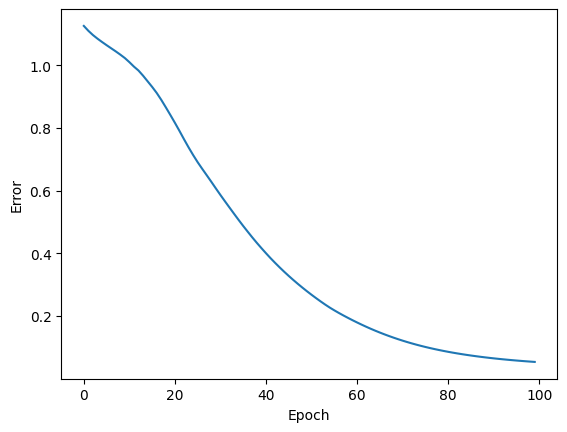

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Error')
plt.xlabel('Epoch')

In [ ]:
# evaluate model on test data set
with torch.no_grad(): # turns off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

loss

tensor(0.1315)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # will tell us what type of flower class network thinks it is
    print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t{y_val.argmax().item()}")
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"\nWe got {correct} correct")

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2 	2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2 	2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2 	2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1 	1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 2 	2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1 	1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2 	2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1 	1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2 	2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2 	2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 2 	2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1 	1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2 	1
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1 	2
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	0
21.) tensor([-2.6161,  4.5584,  0.8575]) 	 1 	1
2

In [ ]:
# checking the model response for new data
new_iris_data = torch.tensor([5.0,	3.6,	1.4,	0.2])
with torch.no_grad():
  print(model(new_iris_data))

tensor([ 4.8496, -2.5121, -3.0175])


In [ ]:
torch.save(model.state_dict(), "iris_model.pt") # save the weight and biases
# for our model that we have trained for the current google lab
# notebook

In [ ]:
# load save model

new_model = Model()
new_model.load_state_dict(torch.load("iris_model.pt"))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

# Types of Neural Network

## Feedforward Neural Networks(FNN)

It is the simples type of neural network where data flows in one-direction, from input to output, without any cycles or loops. It is composed of an input layer, one or more hidden layers, and an output layer

It is good for simple classification and regression problems

It is used for applications like predicting housing price based on various features or classification problems like classifying handwritten digits

## Convolutional Neural Networks

It is specialised neural network for processing grid-like data such as images.

It uses convolution layers to automatically and adaptively learn spatial hierarchies of features from input images. It includes layers like convolutional, pooling, and fully connected layers

It can be used for

*   Autonomous driving
*   Medical imaging
*   Image segmentation (dividing image into multiple regions)



## Recurrent Neural Network

It is designed to handle sequential data by maintaining a hidden state that captures information from previous steps. The output from previous step is fed as input to the current time step

Its application includes

*   Time series prediction
*   Natural language processing tasks
*   Speech recognition and translation



It is used for

*   Stock market forecasting
*   Predicting next word in a sentence
*   Analyzing sentiment in text



## Long Short-Term Memory Networks (LSTM)

It is a type of RNN that addresses the problem of vanishing gradients. This enable the network to learn long-term dependencies.

It has more complex architecture with gating mechanisms to control the flow of information

It can be used for applications like
*    Tasks requiring long-range temporal dependencies
*    Time series forecasting (e.g., predicting electricity consumption)
*    Sequence-to-sequence tasks (e.g., machine translation)

Application of LSTM includes
*    Predicting weather patterns based on historical data
*    Translating sentences from one language to another

## Autoencoders

It is type of unsupervised neural network that learns efficient representations of the input data (encoding) and then attempts to reconstruct the input from these representations (decoding).


It consists of an encoder and a decoder, usually symmetric.

It can be used for applications like
*   Dimensionality reduction
*   Anomaly detection (e.g., detecting fraudulent transactions)
*   Data denoising (e.g., removing noise from images)


It is used for:

*  Compressing data (e.g., image compression)
*  Detecting outliers in data

## Variational Autoencoders

It is a type of autoencoder that generates new data points similar to the training data by learning the distribution of the input data. It introduces probabilistic layers to model data as a distribution rather than deterministic points.


It is used for applications like:
*  Generating new data samples (e.g., creating new images, music, or text)
*  Semi-supervised learning

It is used for
*  Generating realistic images of faces
*  Creating new product designs

## Generative Adversarial Networks

This type of neural type consists of two networks:
1.  A Generator
2.  A Discriminator.


The generator creates fake data, and the discriminator tries to distinguish between real and fake data. The two networks compete, with the generator improving its ability to create realistic data over time.


It is used for applications like:
*  Image generation (e.g., generating realistic images of non-existent objects)
*  Style transfer (e.g., converting photos into paintings)
*  Data augmentation (e.g., generating more training data)


It is used for:
*  Creating realistic images, videos, and animations
*  Enhancing the resolution of images (super-resolution)

## Transformer Networks


It is type of network designed for handling sequential data, particularly in NLP. Transformers use **self-attention mechanisms** to process input data in parallel rather than sequentially, enabling faster training.



The architecture includes encoder and decoder layers, where each layer consists of multi-head attention mechanisms and feedforward neural networks.

It can be used for applications like:
*  Machine translation (e.g., translating text from one language to another)
*  Text summarization
*  Question answering systems


It is used for:
*  Powering models like GPT (Generative Pretrained Transformer) for text generation
*  BERT (Bidirectional Encoder Representations from Transformers) for understanding context in text


## Radial Basis Function Networks

A type of neural network that uses radial basis functions as activation functions. It typically consists of an input layer, a hidden layer with a non-linear RBF activation function, and a linear output layer.
It is good at handling interpolation in multi-dimensional space.


It can be used for applications like
*  Function approximation
*  Time series prediction
*  Control systems


It is used for:
*  Predicting chaotic time series data
*  Implementing adaptive control systems


# Convolutional Neural Networks (CNNs)

**CNN** is a specialized type of neural network designed primarily for processing structured grid data such as images. It takes an input image, assign importance (learnable weights and biases) to various aspects in the image and able to differeniate from one another

Key components include

*   Convolution layers
*   Rectified Linear Unit (ReLu)
*   Pooling layers
*   Fully conntected layers



Image -> Convolution Layer 1 -> Max Pooling -> Convolutional Layer 2 -> Max Pooling -> Fully Connect NN -> Output

In [25]:
# convert the mnist image files into a tensor of 4 dimension
# to keep track of number of images, width, height, and color
# channel

transform = transforms.ToTensor()

In [26]:
# train data
train_data = datasets.MNIST(root='/cnn_data',
                            train=True,
                            transform=transform,
                            download=True)

In [27]:
# test data
test_data = datasets.MNIST(root='/cnn_data',
                            train=False,
                            transform=transform,
                            download=True)

In [28]:
print(f"Training Data Overview: \n\n{train_data}")

Training Data Overview: 

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [29]:
print(f"Test Data Overview: \n\n{train_data}")

Test Data Overview: 

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()


Data is divided into batches which help in training the model with subsets of the data at a time which is more memory efficinet

In [16]:
# load the dataset in batches
# each batch will contain 10 images
# the data will be shuffled before each epoch to ensure the model doesn't
# learn unintended patterns

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

CNN uses a series of alyers to progressively extract high-level features from input data

**1. Convolutional Layers**

*   These layer apply a convolutional operation to the input passing result to next layer
*   **Convolution** is process of sliding a filter over the input data to produce a feature map.
* The primary purpose of this layer is to detect various features of input data such as wedges, texture etc



Steps include
1. An input, which as image represented by 3D tensor of height, width, and channel
2. A filter, which is a small matrix of weight, slides over the input
  * The filter is applied to different regions of input data, performing element-wise multiplication and summing results to produce single value
  * The process is repeated as the filter moves across the entire input, generating a 2D output called **feature map**

3. Activation function is applied and output is passed to pooling layer

**2. Activation Function**
The activation function introduces a non-linearity into the model. This function (ReLu) helps to learn non-linear relationship b/w the features in the image

**3. Pooling Layer**

Pooling layer is used to reduce the spatial dimension (height and width) of feature maps generated by convolution layer


This reduction helps in
* Decrease computational load
* Reduce number of parameters (avoid overfitting)
* Make model invariant to small distortion in input data

Steps include
1. Input is typically feature map from convolutional layer
2. The layer scans over the feature map with defined window size and stride
  * For each window, it divides the input into non-overlapping regions
  * Output the maximum value from each region
3. The result is flattend and feed to fully connected neural network

**4. Fully Connected Neural Network**
After convolutional and pooling layers, the output is flattedinto vectors and passed to fully connected neural network layer. These layer perform high level reasoning and make predictions

**5. Output Layer**
The FCNN passes the value to output layer where a softmax activation function to generate probabilities for extracted features

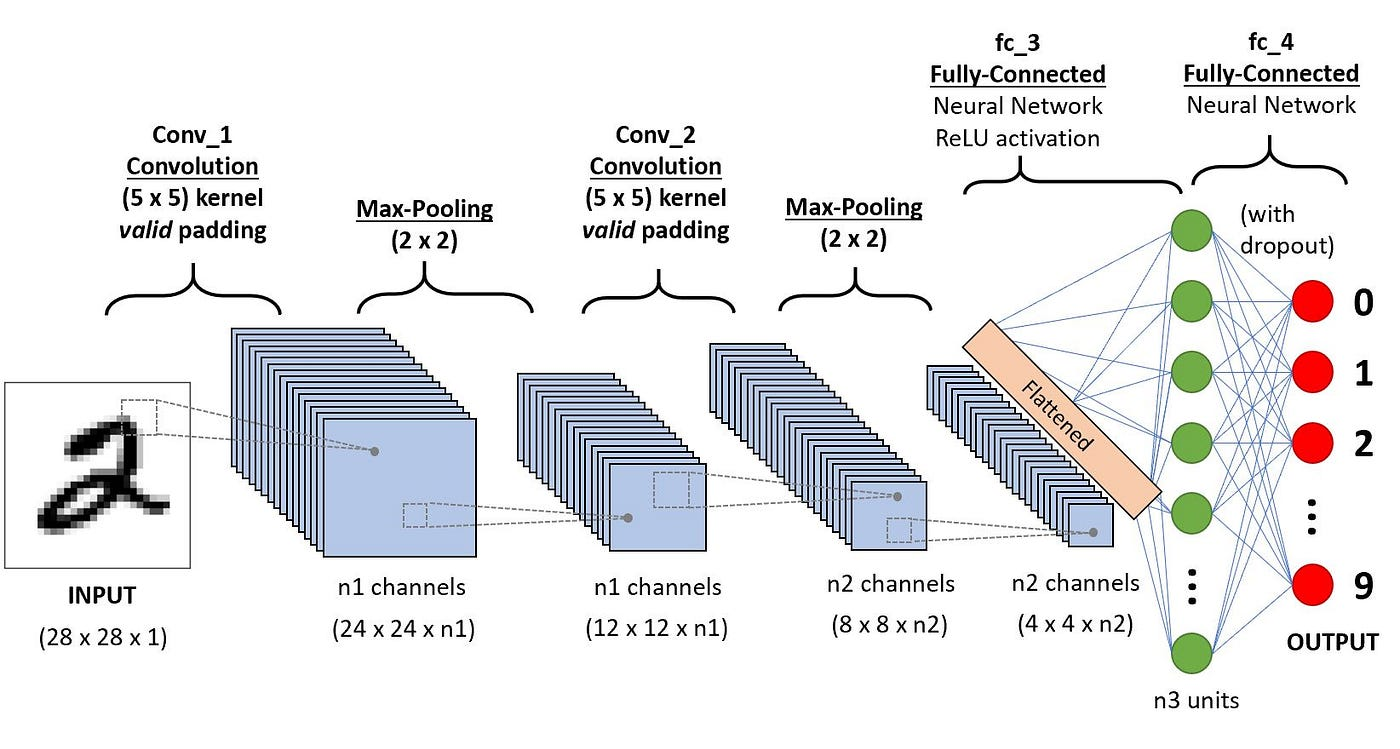

In [30]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 8, 3, 1) # 1 image, 8 output, 3x3 kernel, 1 stride
    self.conv2 = nn.Conv2d(8, 16, 3, 1) # 8 input (output from previous layer)
                                      # 16 output, 3x3 kernel, 1 stride

    # fully connected layer
    self.fc1 = nn.Linear(5*5*16, 150) #flattening to 150 neurons
    self.fc2 = nn.Linear(150, 84)   # arbitary values (can be set to anything)
    self.fc3 = nn.Linear(84, 10) # 10 because 10 numbers to identify

  def forward(self, X):
    X = F.relu(self.conv1(X)) # first convolution layer
    X = F.max_pool2d(X, 2, 2) # 2x2 kernel, 2 stride, pooling layer
    # Second pass
    X = F.relu(self.conv2(X)) #passed to second convolutional layer
    X = F.max_pool2d(X, 2, 2) # 2x2 kernel, 2 stride

    # Review to flatten the data
    X = X.view(-1, 16*5*5) # negative one so that we can vary the batch size
    # converts the 3D tensor into 1D vector to be fed into the fully connected
    # layers

    # fully connected layers

    X = F.relu(self.fc1(X)) #activation function applied in fully cnn
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [31]:
# create an instance of model

torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [32]:
# loss function optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [33]:
start_time = time.time()
current_time = time.time()

epochs = 5 # number of times entire dataset will be passed through the network

# lists to store the losses and number of correct predictions for training and
# testing data
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # training

  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1 # batch
    y_pred = model(X_train) # get predicted value
    loss = criterion(y_pred, y_train)

    # class with highest probability is chose as the predicted label
    predicted = torch.max(y_pred.data, 1)[1]

    # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct True = 1, False = 0
    trn_corr += batch_corr # keep track as we go along in training

    # update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 == 0:
      print(f"Epoch: {i}  Batch: {b} Loss: {loss.item()}")

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # testing

  with torch.no_grad(): # no gradient as we dont want to our weights and biases
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr +=  (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


total = current_time - start_time
print(f"Training took: {total/60} minutes")

Epoch: 0  Batch: 600 Loss: 0.023705067113041878
Epoch: 0  Batch: 1200 Loss: 0.18726857006549835
Epoch: 0  Batch: 1800 Loss: 0.005581941455602646
Epoch: 0  Batch: 2400 Loss: 0.021588627249002457
Epoch: 0  Batch: 3000 Loss: 0.11054973304271698
Epoch: 0  Batch: 3600 Loss: 0.018623532727360725
Epoch: 0  Batch: 4200 Loss: 0.007855492644011974
Epoch: 0  Batch: 4800 Loss: 0.039657533168792725
Epoch: 0  Batch: 5400 Loss: 0.703203558921814
Epoch: 0  Batch: 6000 Loss: 0.015441931784152985
Epoch: 1  Batch: 600 Loss: 0.0696057602763176
Epoch: 1  Batch: 1200 Loss: 0.007918923161923885
Epoch: 1  Batch: 1800 Loss: 0.0007686825119890273
Epoch: 1  Batch: 2400 Loss: 0.0014419667422771454
Epoch: 1  Batch: 3000 Loss: 0.0008773431181907654
Epoch: 1  Batch: 3600 Loss: 0.003343090880662203
Epoch: 1  Batch: 4200 Loss: 0.12798702716827393
Epoch: 1  Batch: 4800 Loss: 0.00041408222750760615
Epoch: 1  Batch: 5400 Loss: 0.00015216402243822813
Epoch: 1  Batch: 6000 Loss: 0.42278456687927246
Epoch: 2  Batch: 600 Los

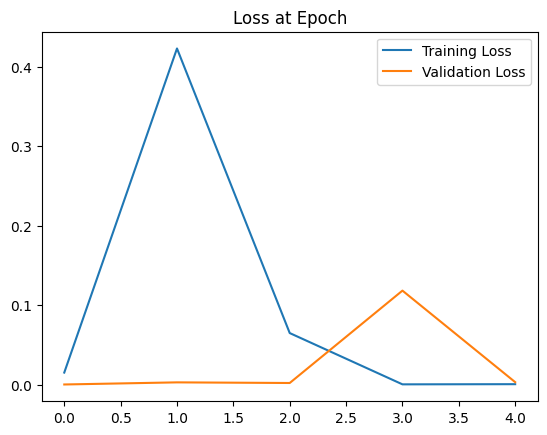

In [34]:
train_losses = [tl.item() for tl in train_losses]

plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss at Epoch')
plt.legend()

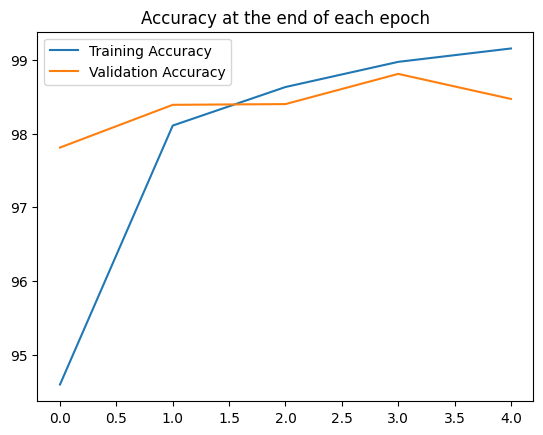

In [35]:
# graph the accuracy
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label='Validation Accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [17]:
test_load = DataLoader(test_data, batch_size=10000, shuffle=False)

In [18]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [21]:
correct.item()/len(test_data) * 100

98.59

In [22]:
test_data[4143] # tensor with an image in it and at end it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [23]:
# grab just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [24]:
test_data[4143][0].reshape(28, 28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

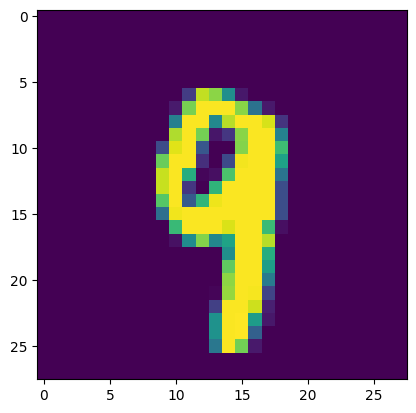

In [26]:
plt.imshow(test_data[4143][0].reshape(28, 28))

In [27]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1, 1, 28, 28))

In [28]:
new_prediction

tensor([[-1.9783e+01, -2.0513e+01, -2.0931e+01, -1.3588e+01, -9.8797e+00,
         -1.4948e+01, -3.3749e+01, -9.2057e+00, -1.4788e+01, -1.5365e-04]])

In [29]:
new_prediction.argmax()

tensor(9)

In [ ]:
``